In [15]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [1]:
#setting data directory

Datadirectory = "E:/University/Dataset/"

Classes = ["CMFD","NMFD","IMFD"]

img_size =224

# Data Preprocessing

In [4]:
#Converting all training data to array with labels

training_Data = [] 

def create_training_Data():
    
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  #label 0,1,2 for classes

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass 

In [5]:
#creating training data

create_training_Data()

In [6]:
len(training_Data)

14564

In [7]:
#shuffling data

import random

random.shuffle(training_Data)

In [8]:
#Splitting features and labels and converting features to numpy array

X = []
y = []

for features,labels in training_Data:
    
    X.append(features)
    y.append(labels)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [9]:
X.shape

(14564, 224, 224, 3)

In [10]:
#normalizing data

X = X/255.0

In [11]:
#Converting labels to numpy array

Y = np.array(y)

In [12]:
len(Y)

14564

In [13]:
#saving data in .npy files

np.save('data', X)
np.save('label', Y)

# Creating Test Dataset

In [129]:
#Create Test set 

Testdirectory = "E:/University/Dataset/Primary/"

TestClasses = ["Face_Mask","No_Mask","Incorrect_Mask"]

img_size =224


In [130]:
testing_Data = [] 

def create_testing_Data():
    
    for tcategory in TestClasses:
        tpath = os.path.join(Testdirectory, tcategory)
        tclass_num = TestClasses.index(tcategory)  #label 0,1,2 for classes

        for img in os.listdir(tpath):
            try:
                img_array = cv2.imread(os.path.join(tpath,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                testing_Data.append([new_array, tclass_num])
            except Exception as e:
                pass 

In [131]:
create_testing_Data()

In [132]:
len(testing_Data)

2930

In [133]:
import random

random.shuffle(testing_Data)

In [134]:
Xt = []
yt = []

for features,labels in testing_Data:
    
    Xt.append(features)
    yt.append(labels)
    
Xt = np.array(Xt).reshape(-1, img_size, img_size, 3)

In [135]:
Xt = Xt/255.0

In [136]:
Yt = np.array(yt)

In [137]:
#saving testing data

np.save('tdata', Xt)
np.save('tlabel', Yt)

# Testing Model Prediction

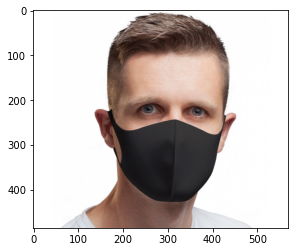

In [3]:
#Getting image to be tested on model

tframe = cv2.imread('download.jpg')
plt.imshow(cv2.cvtColor(tframe, cv2.COLOR_BGR2RGB))

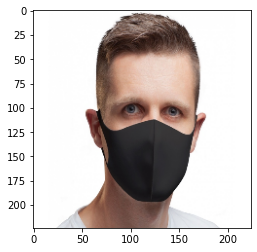

In [4]:
final_image = cv2.resize(tframe, (224,224))
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))

In [5]:
#Image processing 

final_image = cv2.resize(tframe, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image /255.0

In [36]:
new_model = tf.keras.models.load_model("mask_detector.h5")

In [37]:
tfeature = np.load('tdata.npy')
tlabel = np.load('tlabel.npy')

In [29]:
tlabel = to_categorical(tlabel, 3)

In [38]:
new_model.evaluate(tfeature,tlabel, verbose = 0)

[0.04456566646695137, 0.9860067963600159]

In [39]:
predictions = new_model.predict(tfeature)
predictions

array([[1.0000000e+00, 3.5728668e-16, 1.7744727e-08],
       [9.9986696e-01, 8.3721756e-13, 1.3305704e-04],
       [9.2357326e-01, 1.7927981e-05, 7.6408789e-02],
       ...,
       [7.8813355e-18, 1.0000000e+00, 4.8861929e-13],
       [9.9999976e-01, 1.1086551e-18, 1.9351981e-07],
       [1.3758248e-08, 3.1899866e-08, 1.0000000e+00]], dtype=float32)

In [42]:
predictions= np.argmax(predictions, axis=1)
ntlabel= np.argmax(tlabel, axis=1)

In [43]:
print(predictions[:35])
print(ntlabel[:35])

[0 0 0 1 0 2 0 2 0 0 0 0 1 2 2 1 2 1 0 1 0 0 0 0 0 0 2 0 1 1 2 1 1 0 0]
[0 0 0 1 0 2 0 2 0 0 0 0 1 2 2 1 2 1 0 1 0 0 0 0 0 0 2 0 1 1 2 1 1 0 0]
